# Explore PUDL's EIA-923 Allocated

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pudl.analysis.allocate_gen_fuel import (
    allocate_gen_fuel_by_generator_energy_source,
    select_input_data,
)

from oge.load_data import load_complete_eia_generators_for_subplants, load_pudl_table

/Users/brdo/.virtualenvs/open-grid-emissions-zm3GQQDc/lib/python3.11/site-packages/pudl/metadata/classes.py:998: UserWarning: Field name "schema" in "Resource" shadows an attribute in parent "PudlMeta"
  class Resource(PudlMeta):


In [2]:
year = 2024

## From Table

In [3]:
eia923_allocated_table = load_pudl_table(
    "out_eia923__monthly_generation_fuel_by_generator_energy_source",
    year=2024,
)

2025-11-18 11:22:07 [WARNING] oge.oge.column_checks:813 The following columns do not have dtypes assigned in `column_checks.get_dtypes()`
2025-11-18 11:22:07 [WARNING] oge.oge.column_checks:817 ['energy_source_code_num']
2025-11-18 11:22:07 [WARNING] oge.oge.column_checks:817 ['energy_source_code_num']


In [ ]:
code = ["RE", "T"]
to_remove_table = set(
    eia923_allocated_table[["plant_id_eia", "generator_id"]]
    .drop_duplicates()
    .apply(tuple, axis=1)
).difference(
    set(
        load_complete_eia_generators_for_subplants()
        .query("operational_status_code not in @code")[["plant_id_eia", "generator_id"]]
        .drop_duplicates()
        .apply(tuple, axis=1)
    )
)

if len(to_remove_table) > 0:
    print(
        f"Removing {len(to_remove_table)} plant_id_eia/generator_id combinations not in EIA-860"
    )
    eia923_allocated_table = eia923_allocated_table[
        ~eia923_allocated_table[["plant_id_eia", "generator_id"]]
        .apply(tuple, axis=1)
        .isin(to_remove_table)
    ]

Removing 1909 plant_id_eia/generator_id combinations not in EIA-860


In [5]:
display(eia923_allocated_table)

,report_date,plant_id_eia,generator_id,prime_mover_code,energy_source_code,energy_source_code_num,net_generation_mwh,fuel_consumed_mmbtu,fuel_consumed_for_electricity_mmbtu
0,2024-01-01,1,1,IC,DFO,energy_source_code_1,84.040942,909.264696,909.264696
1,2024-01-01,1,2,IC,DFO,energy_source_code_1,84.040942,909.264696,909.264696
2,2024-01-01,1,3,IC,DFO,energy_source_code_1,46.689413,505.147067,505.147067
4,2024-01-01,1,5.1,IC,DFO,energy_source_code_1,37.351531,404.117659,404.117659
5,2024-01-01,1,WT1,WT,WND,energy_source_code_1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
441651,2024-12-01,69094,ST17C,PV,SUN,energy_source_code_1,NaN,NaN,NaN
441652,2024-12-01,69095,DAYH,PV,SUN,energy_source_code_1,NaN,NaN,NaN
441653,2024-12-01,69096,JERIC,PV,SUN,energy_source_code_1,NaN,NaN,NaN
441654,2024-12-01,69097,BRKL1,PV,SUN,energy_source_code_1,NaN,NaN,NaN


## From Analysis

In [6]:
gf = load_pudl_table("out_eia923__monthly_generation_fuel_combined", year)
bf = load_pudl_table("out_eia923__monthly_boiler_fuel", year)
gen = load_pudl_table("out_eia923__monthly_generation", year)
gens = load_pudl_table("out_eia__yearly_generators", year)
bga = load_pudl_table("core_eia860__assn_boiler_generator", year)

gf, bf, gen, bga, gens = select_input_data(gf=gf, bf=bf, gen=gen, bga=bga, gens=gens)
eia923_allocated_analysis = allocate_gen_fuel_by_generator_energy_source(
    gf,
    bf,
    gen,
    bga,
    gens,
    freq="MS",
)

2025-11-18 11:22:37 [    INFO] catalystcoop.pudl.analysis.allocate_gen_fuel:478 The granular data tables contain 61.5% of the fuel and 55.8% of net generation in the higher-coverage generation_fuel_eia923 table.
2025-11-18 11:22:38 [    INFO] catalystcoop.pudl.analysis.allocate_gen_fuel:1582 Distributing 0.1% annually reported records to months.
2025-11-18 11:22:38 [    INFO] catalystcoop.pudl.analysis.allocate_gen_fuel:1582 Distributing 0.1% annually reported records to months.
/Users/brdo/.virtualenvs/open-grid-emissions-zm3GQQDc/lib/python3.11/site-packages/pudl/helpers.py:643: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .ffill()
/Users/brdo/.virtualenvs/open-grid-emissions-zm3GQQDc/lib/python

In [ ]:
code = ["RE", "T"]
to_remove_analysis = set(
    eia923_allocated_analysis[["plant_id_eia", "generator_id"]]
    .drop_duplicates()
    .apply(tuple, axis=1)
).difference(
    set(
        load_complete_eia_generators_for_subplants()
        .query("operational_status_code not in @code")[["plant_id_eia", "generator_id"]]
        .drop_duplicates()
        .apply(tuple, axis=1)
    )
)

if len(to_remove_analysis) > 0:
    print(
        f"Removing {len(to_remove_analysis)} plant_id_eia/generator_id combinations not in EIA-860"
    )
    eia923_allocated_analysis = eia923_allocated_analysis[
        ~eia923_allocated_analysis[["plant_id_eia", "generator_id"]]
        .apply(tuple, axis=1)
        .isin(to_remove_analysis)
    ]

'Removing 318 plant_id_eia/generator_id combinations not in EIA-860'

In [8]:
display(eia923_allocated_analysis)

,report_date,plant_id_eia,generator_id,prime_mover_code,energy_source_code,energy_source_code_num,net_generation_mwh,fuel_consumed_mmbtu,fuel_consumed_for_electricity_mmbtu
0,2024-01-01,1,1,IC,DFO,energy_source_code_1,105.829334,1144.999987,1144.999987
1,2024-01-01,1,2,IC,DFO,energy_source_code_1,105.829334,1144.999987,1144.999987
2,2024-01-01,1,3,IC,DFO,energy_source_code_1,58.794076,636.111121,636.111121
3,2024-01-01,1,5.1,IC,DFO,energy_source_code_1,47.035262,508.888904,508.888904
4,2024-01-01,1,WT1,WT,WND,energy_source_code_1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
410242,2024-12-01,69094,ST17C,PV,SUN,energy_source_code_1,NaN,NaN,NaN
410243,2024-12-01,69095,DAYH,PV,SUN,energy_source_code_1,NaN,NaN,NaN
410244,2024-12-01,69096,JERIC,PV,SUN,energy_source_code_1,NaN,NaN,NaN
410245,2024-12-01,69097,BRKL1,PV,SUN,energy_source_code_1,NaN,NaN,NaN


## Comparison

In [12]:
# Compare the two datasets
print("Dataset Comparison:")
print("=" * 18)
print(f"Table shape: {eia923_allocated_table.shape}")
print(f"Analysis shape: {eia923_allocated_analysis.shape}")

print("\nColumns comparison:")
table_cols = set(eia923_allocated_table.columns)
analysis_cols = set(eia923_allocated_analysis.columns)

print(f"Table columns ({len(table_cols)}): {sorted(table_cols)}")
print(f"Analysis columns ({len(analysis_cols)}): {sorted(analysis_cols)}")

common_cols = table_cols.intersection(analysis_cols)
table_only = table_cols - analysis_cols
analysis_only = analysis_cols - table_cols

print(f"\nCommon columns ({len(common_cols)}): {sorted(common_cols)}")
if table_only:
    print(f"Table-only columns ({len(table_only)}): {sorted(table_only)}")
if analysis_only:
    print(f"Analysis-only columns ({len(analysis_only)}): {sorted(analysis_only)}")

Dataset Comparison:
Table shape: (404364, 9)
Analysis shape: (403551, 9)

Columns comparison:
Table columns (9): ['energy_source_code', 'energy_source_code_num', 'fuel_consumed_for_electricity_mmbtu', 'fuel_consumed_mmbtu', 'generator_id', 'net_generation_mwh', 'plant_id_eia', 'prime_mover_code', 'report_date']
Analysis columns (9): ['energy_source_code', 'energy_source_code_num', 'fuel_consumed_for_electricity_mmbtu', 'fuel_consumed_mmbtu', 'generator_id', 'net_generation_mwh', 'plant_id_eia', 'prime_mover_code', 'report_date']

Common columns (9): ['energy_source_code', 'energy_source_code_num', 'fuel_consumed_for_electricity_mmbtu', 'fuel_consumed_mmbtu', 'generator_id', 'net_generation_mwh', 'plant_id_eia', 'prime_mover_code', 'report_date']


In [13]:
# Compare key identifier combinations
table_keys = set(
    eia923_allocated_table[
        ["plant_id_eia", "generator_id"]  # , "energy_source_code", "report_date"]
    ]
    .drop_duplicates()
    .apply(tuple, axis=1)
)

analysis_keys = set(
    eia923_allocated_analysis[
        ["plant_id_eia", "generator_id"]  # , "energy_source_code", "report_date"]
    ]
    .drop_duplicates()
    .apply(tuple, axis=1)
)

print(f"\nKey combinations comparison:")
print(f"Table unique keys: {len(table_keys):,}")
print(f"Analysis unique keys: {len(analysis_keys):,}")
print(f"Common keys: {len(table_keys.intersection(analysis_keys)):,}")
print(f"Table-only keys: {len(table_keys - analysis_keys):,}")
print(f"Analysis-only keys: {len(analysis_keys - table_keys):,}")

if len(table_keys - analysis_keys) > 0:
    print("\ntable-only keys:")
    sample_table_only = list(table_keys - analysis_keys)
    for key in sample_table_only:
        print(f"  {key}")

if len(analysis_keys - table_keys) > 0:
    print("\nanalysis-only keys:")
    sample_analysis_only = list(analysis_keys - table_keys)
    for key in sample_analysis_only:
        print(f"  {key}")


Key combinations comparison:
Table unique keys: 26,916
Analysis unique keys: 26,862
Common keys: 26,858
Table-only keys: 58
Analysis-only keys: 4

table-only keys:
  (52120, 'G-45')
  (6390, '4')
  (6390, '3')
  (50766, 'OE14')
  (54327, 'TOY2')
  (50766, 'OE1')
  (2352, '7')
  (54327, 'TOY1')
  (1868, '2')
  (52120, 'G-42')
  (6637, '2A')
  (2296, '5')
  (55556, 'UNT1')
  (52120, 'G-41')
  (50766, 'OE28')
  (1286, '1')
  (50766, 'OE9')
  (7971, '2')
  (50766, 'OE6')
  (50766, 'OE25')
  (50766, 'OE4')
  (52120, 'G-32')
  (50766, 'OE11')
  (50766, 'OE24')
  (2352, '6')
  (10213, 'GEN4')
  (50766, 'OE7')
  (55053, '325')
  (6330, '3')
  (2225, '1')
  (50766, 'OE5')
  (2225, '3')
  (50766, 'OE22')
  (10213, 'GEN3')
  (6345, '3')
  (50766, 'OE13')
  (6358, '1')
  (50766, 'OE27')
  (50766, 'OE8')
  (50766, 'OE10')
  (6565, '3A')
  (55053, '324')
  (58052, '1TG')
  (7971, '1')
  (50766, 'OE2')
  (6637, '4')
  (6637, '3')
  (50766, 'OE3')
  (6329, '5')
  (50766, 'OE16')
  (10109, '2')
  (229

In [14]:
# Compare numeric values for common records
if len(common_cols) > 0 and len(table_keys.intersection(analysis_keys)) > 0:
    # Merge on common key columns for comparison
    key_cols = ["plant_id_eia", "generator_id", "energy_source_code", "report_date"]

    # Get numeric columns that exist in both datasets
    numeric_cols = []
    for col in common_cols:
        if (
            col not in key_cols
            and pd.api.types.is_numeric_dtype(eia923_allocated_table[col])
            and pd.api.types.is_numeric_dtype(eia923_allocated_analysis[col])
        ):
            numeric_cols.append(col)

    print(f"\nNumeric columns for comparison: {numeric_cols}")

    if numeric_cols:
        # Merge datasets for comparison
        table_subset = eia923_allocated_table[key_cols + numeric_cols].copy()
        analysis_subset = eia923_allocated_analysis[key_cols + numeric_cols].copy()

        # Add suffixes to distinguish sources
        table_subset = table_subset.add_suffix("_table")
        analysis_subset = analysis_subset.add_suffix("_analysis")

        # Restore key column names for merging
        for col in key_cols:
            table_subset[col] = table_subset[f"{col}_table"]
            analysis_subset[col] = analysis_subset[f"{col}_analysis"]

        # Merge
        comparison = pd.merge(table_subset, analysis_subset, on=key_cols, how="inner")

        print(f"Records for comparison: {len(comparison):,}")

        # Compare each numeric column
        for col in numeric_cols:
            table_col = f"{col}_table"
            analysis_col = f"{col}_analysis"

            # Calculate differences
            diff = comparison[table_col] - comparison[analysis_col]

            print(f"\n{col} comparison:")
            print(f"  Mean difference: {diff.mean():.6f}")
            print(f"  Max absolute difference: {diff.abs().max():.6f}")
            print(f"  Records with differences > 0.001: {(diff.abs() > 0.001).sum():,}")
else:
    print("\nCannot perform numeric comparison - no common records or columns")


Numeric columns for comparison: ['fuel_consumed_for_electricity_mmbtu', 'net_generation_mwh', 'fuel_consumed_mmbtu']
Records for comparison: 403,524

fuel_consumed_for_electricity_mmbtu comparison:
  Mean difference: -159.872863
  Max absolute difference: 1305849.500000
  Records with differences > 0.001: 21,926

net_generation_mwh comparison:
  Mean difference: -19.289704
  Max absolute difference: 24439.633354
  Records with differences > 0.001: 18,944

fuel_consumed_mmbtu comparison:
  Mean difference: -317.056973
  Max absolute difference: 1305849.500000
  Records with differences > 0.001: 22,103


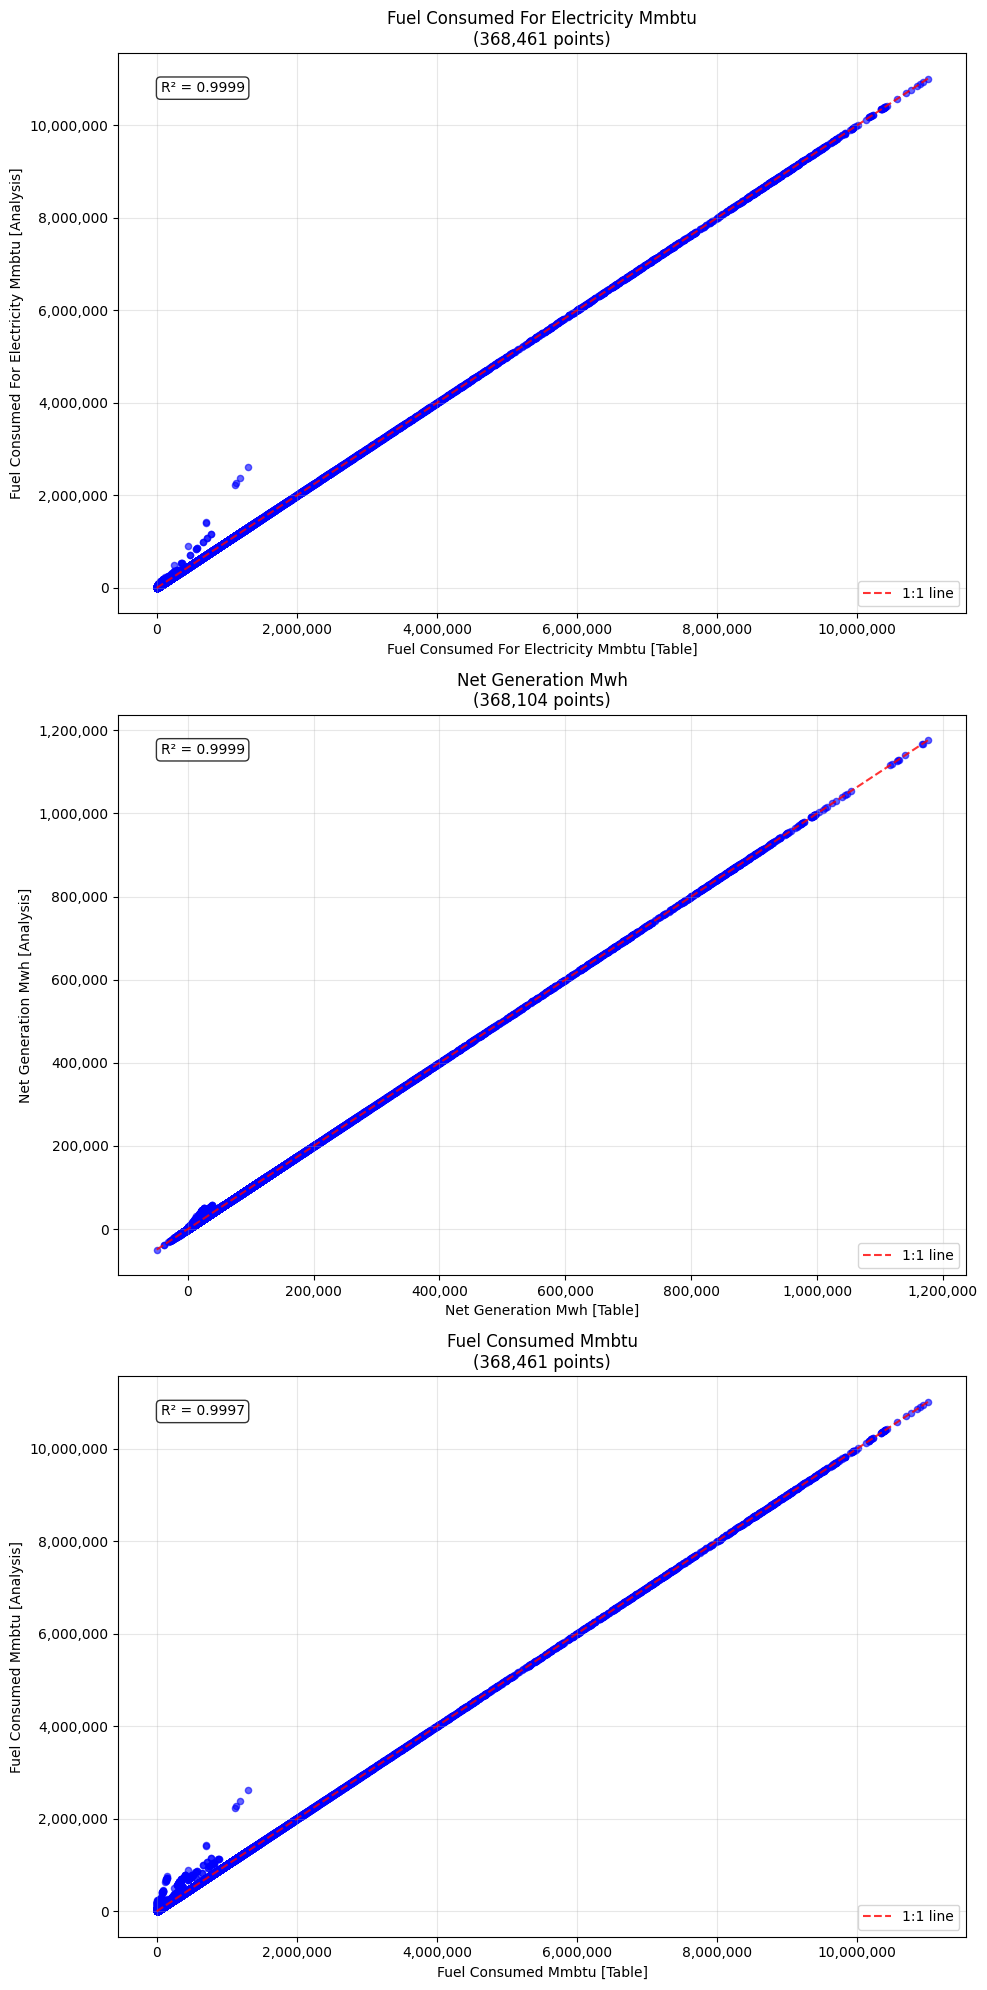


Scatter plots show comparison of 3 numeric columns
Points close to the red diagonal line indicate good agreement between datasets


In [16]:
# Create scatter plots for numeric comparisons
if "comparison" in locals() and "numeric_cols" in locals() and len(numeric_cols) >= 3:
    # Select up to 3 most important numeric columns for plotting
    plot_cols = numeric_cols[:3] if len(numeric_cols) >= 3 else numeric_cols

    fig, axes = plt.subplots(len(plot_cols), 1, figsize=(10, 20))
    if len(plot_cols) == 1:
        axes = [axes]  # Make it iterable for single subplot

    for i, col in enumerate(plot_cols):
        table_col = f"{col}_table"
        analysis_col = f"{col}_analysis"

        # Remove any NaN values for plotting
        plot_data = comparison[[table_col, analysis_col]].dropna()

        if len(plot_data) > 0:
            # Create scatter plot
            axes[i].scatter(
                plot_data[table_col],
                plot_data[analysis_col],
                alpha=0.6,
                s=20,
                color="blue",
            )

            # Add 1:1 line
            min_val = min(plot_data[table_col].min(), plot_data[analysis_col].min())
            max_val = max(plot_data[table_col].max(), plot_data[analysis_col].max())
            axes[i].plot(
                [min_val, max_val],
                [min_val, max_val],
                "r--",
                alpha=0.8,
                label="1:1 line",
            )

            # Set labels and title
            axes[i].set_xlabel(f"{col.replace('_', ' ').title()} [Table]")
            axes[i].set_ylabel(f"{col.replace('_', ' ').title()} [Analysis]")
            axes[i].set_title(
                f"{col.replace('_', ' ').title()}\n({len(plot_data):,} points)"
            )
            axes[i].grid(True, alpha=0.3)
            axes[i].legend()

            # Disable scientific notation on axes
            axes[i].ticklabel_format(style="plain", useOffset=False)
            axes[i].xaxis.set_major_formatter(
                plt.FuncFormatter(lambda x, p: f"{x:,.0f}")
            )
            axes[i].yaxis.set_major_formatter(
                plt.FuncFormatter(lambda y, p: f"{y:,.0f}")
            )

            # Calculate R²
            correlation_matrix = np.corrcoef(
                plot_data[table_col], plot_data[analysis_col]
            )
            r_squared = correlation_matrix[0, 1] ** 2
            axes[i].text(
                0.05,
                0.95,
                f"R² = {r_squared:.4f}",
                transform=axes[i].transAxes,
                verticalalignment="top",
                bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
            )
        else:
            axes[i].text(
                0.5,
                0.5,
                "No data to plot",
                ha="center",
                va="center",
                transform=axes[i].transAxes,
            )
            axes[i].set_title(f"{col} - No data")

    plt.tight_layout()
    plt.show()

    print(f"\nScatter plots show comparison of {len(plot_cols)} numeric columns")
    print(
        "Points close to the red diagonal line indicate good agreement between datasets"
    )

elif "numeric_cols" in locals():
    print(f"\nAvailable numeric columns for plotting: {numeric_cols}")
    if len(numeric_cols) < 3:
        print(
            f"Need at least 3 numeric columns for comparison, found {len(numeric_cols)}"
        )
else:
    print("\nNo comparison data available for scatter plots")

In [17]:
# Summary statistics comparison
print("\n" + "=" * 50)
print("SUMMARY STATISTICS COMPARISON")
print("=" * 50)

# Compare total generation and fuel consumption
for dataset, name in [
    (eia923_allocated_table, "Table"),
    (eia923_allocated_analysis, "Analysis"),
]:
    print(f"\n{name} dataset summary:")

    if "net_generation_mwh" in dataset.columns:
        total_gen = dataset["net_generation_mwh"].sum()
        print(f"  Total generation: {total_gen:,.0f} MWh")

    if "fuel_consumed_mmbtu" in dataset.columns:
        total_fuel = dataset["fuel_consumed_mmbtu"].sum()
        print(f"  Total fuel consumed: {total_fuel:,.0f} MMBtu")

    print(f"  Number of records: {len(dataset):,}")
    print(f"  Unique plants: {dataset['plant_id_eia'].nunique():,}")
    print(
        f"  Unique generators: {dataset[['plant_id_eia', 'generator_id']].drop_duplicates().shape[0]:,}"
    )

    if "energy_source_code" in dataset.columns:
        print(
            f"  Energy source codes: {sorted(dataset['energy_source_code'].unique())}"
        )

    if "report_date" in dataset.columns:
        date_range = f"{dataset['report_date'].min()} to {dataset['report_date'].max()}"
        print(f"  Date range: {date_range}")


SUMMARY STATISTICS COMPARISON

Table dataset summary:
  Total generation: 4,236,077,121 MWh
  Total fuel consumed: 35,088,969,668 MMBtu
  Number of records: 404,364
  Unique plants: 13,374
  Unique generators: 26,916
  Energy source codes: ['AB', 'ANT', 'BFG', 'BIT', 'BLQ', 'DFO', 'GEO', 'JF', 'KER', 'LFG', 'LIG', 'MSB', 'MSN', 'MWH', 'NG', 'NUC', 'OBG', 'OBL', 'OBS', 'OG', 'OTH', 'PC', 'PG', 'PUR', 'RC', 'RFO', 'SC', 'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'TDF', 'WAT', 'WC', 'WDL', 'WDS', 'WH', 'WND', 'WO']
  Date range: 2024-01-01 00:00:00 to 2024-12-01 00:00:00

Analysis dataset summary:
  Total generation: 4,243,613,849 MWh
  Total fuel consumed: 35,205,028,306 MMBtu
  Number of records: 403,551
  Unique plants: 13,377
  Unique generators: 26,862
  Energy source codes: ['AB', 'ANT', 'BFG', 'BIT', 'BLQ', 'DFO', 'GEO', 'JF', 'KER', 'LFG', 'LIG', 'MSB', 'MSN', 'MWH', 'NG', 'NUC', 'OBG', 'OBL', 'OBS', 'OG', 'OTH', 'PC', 'PG', 'PUR', 'RC', 'RFO', 'SC', 'SGC', 'SGP', 'SLW', 'SUB', 'SUN', 'T

In [ ]:
# Find plant/generator combinations with relative differences > 50%
if "comparison" in locals() and "numeric_cols" in locals() and len(numeric_cols) > 0:
    print("PLANT/GENERATOR COMBINATIONS WITH RELATIVE DIFFERENCES > 50%")
    print("=" * 60)

    # Track all problematic plant/generator combinations
    problematic_plants_gens = set()
    detailed_issues = []

    for col in numeric_cols:
        table_col = f"{col}_table"
        analysis_col = f"{col}_analysis"

        # Calculate relative differences for non-zero values
        comparison_clean = comparison[
            [
                table_col,
                analysis_col,
                "plant_id_eia",
                "generator_id",
                "energy_source_code",
                "report_date",
            ]
        ].dropna()

        if len(comparison_clean) == 0:
            continue

        # Calculate relative percentage error (avoid division by zero)
        table_nonzero = comparison_clean[table_col] != 0
        rel_error = pd.Series(index=comparison_clean.index, dtype=float)
        rel_error[table_nonzero] = (
            (
                comparison_clean[table_col][table_nonzero]
                - comparison_clean[analysis_col][table_nonzero]
            )
            / comparison_clean[table_col][table_nonzero]
            * 100
        ).abs()

        # Find records with >50% relative error
        high_error_mask = rel_error > 50
        high_error_records = comparison_clean[high_error_mask]

        if len(high_error_records) > 0:
            print(
                f"\n{col.upper()} - {len(high_error_records):,} records with >50% relative difference"
            )

            for idx, row in high_error_records.iterrows():
                plant_id = int(row["plant_id_eia"])
                gen_id = row["generator_id"]

                # Add to problematic set
                problematic_plants_gens.add((plant_id, gen_id))

                # Store detailed info
                detailed_issues.append(
                    {
                        "plant_id_eia": plant_id,
                        "generator_id": gen_id,
                        "energy_source_code": row["energy_source_code"],
                        "report_date": str(row["report_date"])[:10],
                        "column": col,
                        "table_value": row[table_col],
                        "analysis_value": row[analysis_col],
                        "relative_error_pct": rel_error[idx],
                    }
                )

    # Summary of unique problematic plant/generator combinations
    print(f"\n" + "=" * 79)
    print(
        f"SUMMARY: {len(problematic_plants_gens):,} unique plant/generator combinations have >50% relative differences"
    )
    print("=" * 79)

    if problematic_plants_gens:
        # Simple approach - create summary manually
        issues_df = pd.DataFrame(detailed_issues).sort_values(
            by=["plant_id_eia", "generator_id", "report_date"]
        )
        display(issues_df)

    else:
        print("No plant/generator combinations found with >50% relative differences")
        problematic_combinations_list = []

else:
    print("No comparison data available for analysis")
    problematic_combinations_list = []

PLANT/GENERATOR COMBINATIONS WITH RELATIVE DIFFERENCES > 50%

FUEL_CONSUMED_FOR_ELECTRICITY_MMBTU - 5,906 records with >50% relative difference

NET_GENERATION_MWH - 5,406 records with >50% relative difference

FUEL_CONSUMED_MMBTU - 5,962 records with >50% relative difference

SUMMARY: 527 unique plant/generator combinations have >50% relative differences


,plant_id_eia,generator_id,energy_source_code,report_date,column,table_value,analysis_value,relative_error_pct
0,75,3R,NG,2024-01-01,fuel_consumed_for_electricity_mmbtu,20101.572169,31039.581372,54.4137
5906,75,3R,NG,2024-01-01,net_generation_mwh,1483.791219,2291.176923,54.4137
11312,75,3R,NG,2024-01-01,fuel_consumed_mmbtu,20101.572169,31039.581372,54.4137
522,75,3R,NG,2024-02-01,fuel_consumed_for_electricity_mmbtu,16642.272595,25697.948902,54.4137
6373,75,3R,NG,2024-02-01,net_generation_mwh,1228.467333,1896.921864,54.4137
...,...,...,...,...,...,...,...,...
10854,65494,HER2,NG,2024-11-01,net_generation_mwh,270.058990,540.117981,100.0000
16771,65494,HER2,NG,2024-11-01,fuel_consumed_mmbtu,3180.500000,6361.000000,100.0000
5905,65494,HER2,NG,2024-12-01,fuel_consumed_for_electricity_mmbtu,3613.500000,7227.000000,100.0000
11311,65494,HER2,NG,2024-12-01,net_generation_mwh,306.786011,613.572021,100.0000
